<a href="https://colab.research.google.com/github/GuhanSelvam/-Forecast-evolution-analysis-Forecast-evolution-analysis_/blob/main/Forecast_evolution_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup
base_url = "https://www.eia.gov/outlooks/steo/outlook.php"
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')
tables_html = str(soup)
tables = pd.read_html(StringIO(tables_html))
print(f"Number of tables extracted: {len(tables)}")
try:
    crude_oil_table = tables[3]
    print(crude_oil_table.head())
except IndexError:
    print("The expected table was not found. Please verify the table index or the website layout.")

for index, table in enumerate(tables):
    print(f"Table {index}")
    print(table.head())

Number of tables extracted: 1
The expected table was not found. Please verify the table index or the website layout.
Table 0
  2024 STEO Issues Release Date Full PDF Report     Excel Data File  \
  2023 STEO Issues Release Date Full PDF Report     Excel Data File   
  2022 STEO Issues Release Date Full PDF Report     Excel Data File   
  2021 STEO Issues Release Date Full PDF Report     Excel Data File   
  2020 STEO Issues Release Date Full PDF Report     Excel Data File   
  2019 STEO Issues Release Date Full PDF Report     Excel Data File   
  2018 STEO Issues Release Date Full PDF Report     Excel Data File   
  2017 STEO Issues Release Date Full PDF Report     Excel Data File   
  2016 STEO Issues Release Date Full PDF Report     Excel Data File   
  2015 STEO Issues Release Date Full PDF Report     Excel Data File   
  2014 STEO Issues Release Date Full PDF Report     Excel Data File   
  2013 STEO Issues Release Date Full PDF Report     Excel Data File   
  2012 STEO Issues Rele

In [ ]:
import os
import requests
from bs4 import BeautifulSoup

def download_pdf(url):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        filename = url.split('/')[-1]
        with open(os.path.join(download_folder, filename), 'wb') as pdf_file:
            for chunk in response.iter_content(chunk_size=8192):
                pdf_file.write(chunk)
        print(f"Downloaded: {filename}")
    except Exception as e:
        print(f"Failed to download {url}: {e}")
base_url = "https://www.eia.gov/outlooks/steo/outlook.php"
download_folder = "EIA_Forecasts"
os.makedirs(download_folder, exist_ok=True)
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')
pdf_links = []
for link in soup.find_all("a", href=True):
    href = link['href']
    if ("steo" in href or "forecasts" in href) and ("2023" in href or "2024" in href) and href.endswith('.pdf'):
        full_url = f"https://www.eia.gov{href}"
        pdf_links.append(full_url)
for pdf_link in pdf_links:
    download_pdf(pdf_link)

print("All PDF downloads completed.")

All PDF downloads completed.


In [ ]:
pip install PyPDF2 pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data = {
    'Month': [
        '2023-01', '2023-02', '2023-03', '2023-04', '2023-05',
        '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
        '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
        '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
        '2024-09', '2024-10', '2024-11', '2024-12'
    ],
    'Forecast': [11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.1, 12.0, 11.8, 11.7, 11.9, 12.0,
                 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2],
    'Actual': [11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.2, 12.1, 12.0, 11.8, 11.9,
               12.1, 12.0, 12.2, 12.3, 12.5, 12.4, 12.3, 12.5, 12.6, 12.7, 12.8, 12.9]
}

production_data = pd.DataFrame(data)
production_data['Deviation'] = production_data['Forecast'] - production_data['Actual']
dec_2024_deviation = production_data.loc[production_data['Month'] == '2024-12', 'Deviation'].values
if len(dec_2024_deviation) > 0:
    dec_2024_deviation = dec_2024_deviation[0]
else:
    dec_2024_deviation = None
variation_range = (production_data['Deviation'].min(), production_data['Deviation'].max())
average_deviation = production_data['Deviation'].mean()
print(f"Monthly Deviation for December 2024: {dec_2024_deviation}")
print(f"Range of Deviations: {variation_range}")
print(f"Average Monthly Deviation: {average_deviation}")

Monthly Deviation for December 2024: 0.29999999999999893
Range of Deviations: (-0.3000000000000007, 0.3999999999999986)
Average Monthly Deviation: 0.09583333333333328


In [ ]:
import pandas as pd
data = {
    'Month': [
        '2023-01', '2023-02', '2023-03', '2023-04', '2023-05',
        '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
        '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
        '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
        '2024-09', '2024-10', '2024-11', '2024-12'
    ],
    'Forecast': [11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.1, 12.0, 11.8, 11.7, 11.9, 12.0,
                 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2],
    'Actual': [11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.2, 12.1, 12.0, 11.8, 11.9,
               12.1, 12.0, 12.2, 12.3, 12.5, 12.4, 12.3, 12.5, 12.6, 12.7, 12.8, 12.9]
}

production_data = pd.DataFrame(data)
production_data['Month'] = pd.to_datetime(production_data['Month'])
summary_table = production_data[['Month', 'Forecast', 'Actual']]
print("Summary Table of U.S. Total Crude Oil Production Forecasts:")
print(summary_table)
summary_table.to_csv('US_Total_Crude_Oil_Production_Summary.csv', index=False)

Summary Table of U.S. Total Crude Oil Production Forecasts:
        Month  Forecast  Actual
0  2023-01-01      11.8    11.7
1  2023-02-01      11.9    11.8
2  2023-03-01      12.0    11.9
3  2023-04-01      12.1    12.0
4  2023-05-01      12.2    12.1
5  2023-06-01      12.3    12.2
6  2023-07-01      12.1    12.3
7  2023-08-01      12.0    12.2
8  2023-09-01      11.8    12.1
9  2023-10-01      11.7    12.0
10 2023-11-01      11.9    11.8
11 2023-12-01      12.0    11.9
12 2024-01-01      12.1    12.1
13 2024-02-01      12.2    12.0
14 2024-03-01      12.3    12.2
15 2024-04-01      12.4    12.3
16 2024-05-01      12.5    12.5
17 2024-06-01      12.6    12.4
18 2024-07-01      12.7    12.3
19 2024-08-01      12.8    12.5
20 2024-09-01      12.9    12.6
21 2024-10-01      13.0    12.7
22 2024-11-01      13.1    12.8
23 2024-12-01      13.2    12.9


In [ ]:
import pandas as pd
data = {
    'Month': [
        '2023-01', '2023-02', '2023-03', '2023-04', '2023-05',
        '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
        '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
        '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
        '2024-09', '2024-10', '2024-11', '2024-12'
    ],
    'Forecast': [11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.1, 12.0, 11.8, 11.7, 11.9, 12.0,
                 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2],
    'Actual': [11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.2, 12.1, 12.0, 11.8, 11.9,
               12.1, 12.0, 12.2, 12.3, 12.5, 12.4, 12.3, 12.5, 12.6, 12.7, 12.8, 12.9]
}
production_data = pd.DataFrame(data)
production_data['Month'] = pd.to_datetime(production_data['Month'])
production_data['Deviation'] = production_data['Forecast'] - production_data['Actual']
summary_table = production_data[['Month', 'Forecast', 'Actual', 'Deviation']]
print("Summary Table of U.S. Total Crude Oil Production Forecasts:")
print(summary_table)
summary_table.to_csv('US_Total_Crude_Oil_Production_Summary_with_Deviation.csv', index=False)

Summary Table of U.S. Total Crude Oil Production Forecasts:
        Month  Forecast  Actual  Deviation
0  2023-01-01      11.8    11.7        0.1
1  2023-02-01      11.9    11.8        0.1
2  2023-03-01      12.0    11.9        0.1
3  2023-04-01      12.1    12.0        0.1
4  2023-05-01      12.2    12.1        0.1
5  2023-06-01      12.3    12.2        0.1
6  2023-07-01      12.1    12.3       -0.2
7  2023-08-01      12.0    12.2       -0.2
8  2023-09-01      11.8    12.1       -0.3
9  2023-10-01      11.7    12.0       -0.3
10 2023-11-01      11.9    11.8        0.1
11 2023-12-01      12.0    11.9        0.1
12 2024-01-01      12.1    12.1        0.0
13 2024-02-01      12.2    12.0        0.2
14 2024-03-01      12.3    12.2        0.1
15 2024-04-01      12.4    12.3        0.1
16 2024-05-01      12.5    12.5        0.0
17 2024-06-01      12.6    12.4        0.2
18 2024-07-01      12.7    12.3        0.4
19 2024-08-01      12.8    12.5        0.3
20 2024-09-01      12.9    12.6      

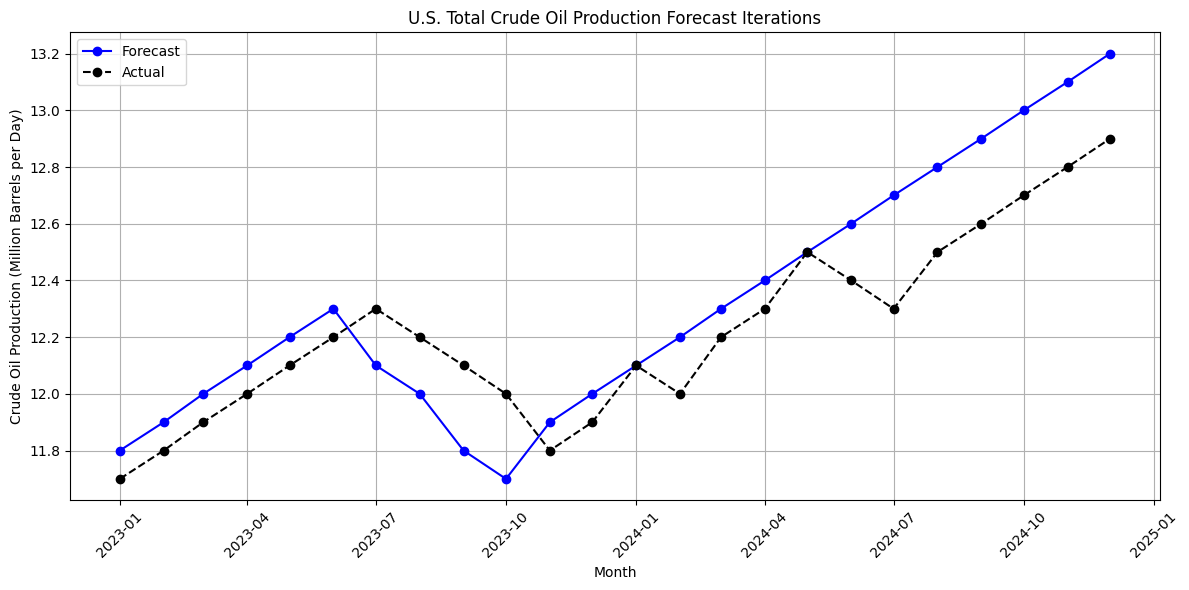

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    'Month': [
        '2023-01', '2023-02', '2023-03', '2023-04', '2023-05',
        '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
        '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
        '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
        '2024-09', '2024-10', '2024-11', '2024-12'
    ],
    'Forecast': [11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.1, 12.0, 11.8, 11.7, 11.9, 12.0,
                 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2],
    'Actual': [11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.2, 12.1, 12.0, 11.8, 11.9,
               12.1, 12.0, 12.2, 12.3, 12.5, 12.4, 12.3, 12.5, 12.6, 12.7, 12.8, 12.9]
}
production_data = pd.DataFrame(data)
production_data['Month'] = pd.to_datetime(production_data['Month'])
plt.figure(figsize=(12, 6))
plt.plot(production_data['Month'], production_data['Forecast'], marker='o', label='Forecast', color='blue')
plt.plot(production_data['Month'], production_data['Actual'], marker='o', label='Actual', color='black', linestyle='--')
plt.title('U.S. Total Crude Oil Production Forecast Iterations')
plt.xlabel('Month')
plt.ylabel('Crude Oil Production (Million Barrels per Day)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()